# Netflix Movies and TV Shows

## Movies and TV Shows listings on Netflix

TV Shows and Movies listed on Netflix
This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

The dataset is prepared by Shivam Bansal.

Here is the link : https://www.kaggle.com/shivamb/netflix-shows

1 - Import libraries I used for visualization

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
from collections import Counter
from operator import itemgetter
from IPython.display import display, HTML
from plotly.subplots import make_subplots
from wordcloud import WordCloud, STOPWORDS,ImageColorGenerator 
from PIL import Image, ImageOps
import plotly.express as px
import plotly.io as pio
%matplotlib inline

2 - Define dataframe after loading all values from cv file and assigning them to it

In [65]:
file_location_url = "files/netflix_titles.csv";

netflix_df = pd.read_csv(file_location_url, error_bad_lines=False,encoding = "utf-8")

3 - Show first 5 values of dataframe

In [66]:
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


4 - show last 5 values of dataframe

In [67]:
netflix_df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6229,80000063,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6230,70286564,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,NaN,NaN,NaN,2016,NaN,60 min,Movies,Nursery rhymes and original music for children...
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
6233,70153404,TV Show,Friends,NaN,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaN,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...


5 - Show each column information of dataframe

In [68]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


6 - Show how many variables there are in dataframe

In [69]:
netflix_df.count()

show_id         6234
type            6234
title           6234
director        4265
cast            5664
country         5758
date_added      6223
release_year    6234
rating          6224
duration        6234
listed_in       6234
description     6234
dtype: int64

7 - Show descriptive statistics of dataframe

In [70]:
netflix_df.describe()

,show_id,release_year
count,6.234000e+03,6234.00000
mean,7.670368e+07,2013.35932
std,1.094296e+07,8.81162
min,2.477470e+05,1925.00000
25%,8.003580e+07,2013.00000
50%,8.016337e+07,2016.00000
75%,8.024489e+07,2018.00000
max,8.123573e+07,2020.00000


8 - Determine if null values of each column  are in a dataframe

In [71]:
netflix_df.isnull().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

9 - Check whether duplicated values exist or not in dataframe

In [72]:
netflix_df.duplicated().sum()

0

10 - Remove all null values from dataframe

In [73]:
netflix_df.dropna(inplace=True)

11 - Determine if null values of each column are in a dataframe

In [74]:
netflix_df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

12 - Add two more columns named for year and month derived from by date_added

In [75]:
netflix_df['year'] = netflix_df['date_added'].apply(lambda x : x.split(', ')[-1])
netflix_df['month'] = netflix_df['date_added'].apply(lambda x : x.lstrip().split(' ')[0])

13 - Draw a figure regarding Netflix Update Content

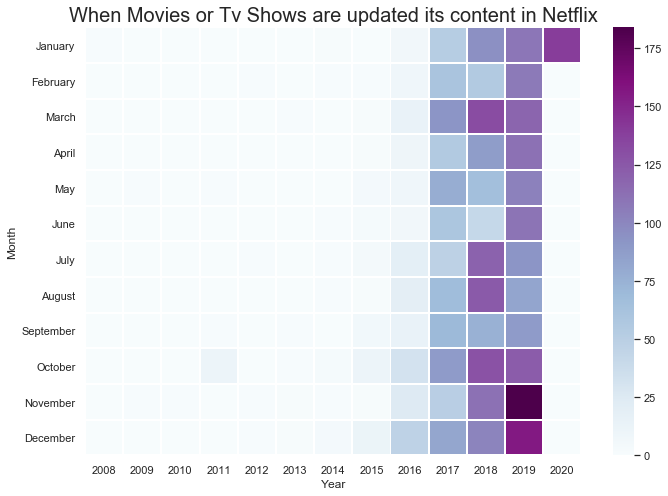

In [76]:
plt.figure(figsize=(10, 7))

netflix_df['month'] = pd.Categorical(netflix_df['month'], 
                                                categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], 
                                                ordered=True)

netflix_df_year_month = netflix_df.groupby(["year", "month"])["show_id"].size().reset_index()
netflix_df_year_month = netflix_df_year_month.pivot("month", "year", "show_id")
sns.heatmap(netflix_df_year_month, cmap="BuPu", linewidths=1 )

plt.title("When Movies or Tv Shows are updated its content in Netflix", y=1, fontsize=20)
plt.xlabel('Year')
plt.ylabel('Month')
plt.savefig('images/image1.png')
plt.tight_layout()
plt.show()

14 - Draw a figure regarding the count of TV shows versus the count of movies by showing bar graph

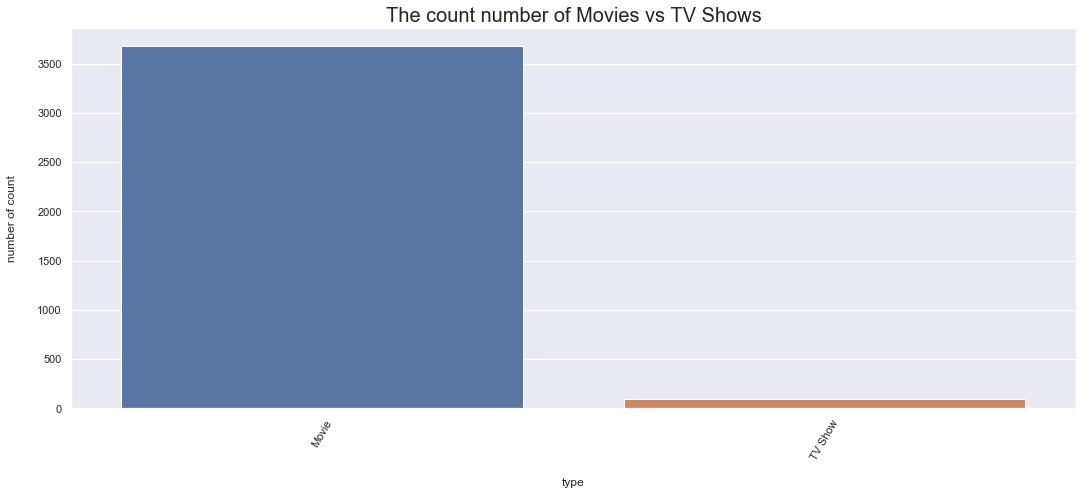

In [77]:
plt.figure(figsize=(18,7))
sns.set(style="darkgrid")
sns.countplot(x='type', data = netflix_df)
plt.title('The count number of Movies vs TV Shows', fontsize=20, y=1)
plt.xlabel('type', labelpad=16)
plt.ylabel('number of count', labelpad=20)
plt.xticks(rotation=60)
plt.savefig('images/image2.png')
plt.show();

15 - Draw a Figure regarding the count of TV shows versus the count of movies by showing pie graph

In [78]:
pie_netflix=netflix_df["type"].value_counts()

trace=go.Pie(labels=pie_netflix.index, values=pie_netflix.values,pull=[0.05])
layout = go.Layout(title="TV Shows VS Movies", height=400, legend=dict(x=1.1, y=1.3))
fig = go.Figure(data=[trace], layout=layout)
fig.update_layout(height=500, width=700)
pio.write_image(fig, "images/image3.png")
fig.show()

16- Draw a figure ragarding rating analysis

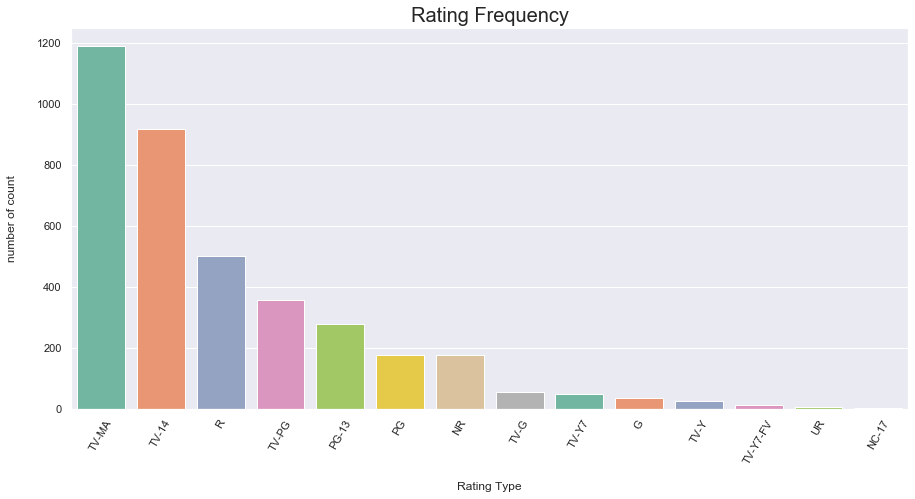

In [79]:
plt.figure(figsize=(15, 7))
sns.set(style="darkgrid")
ax = sns.countplot(x="rating", 
                   data=netflix_df, 
                   palette="Set2", 
                   order=netflix_df['rating'].value_counts().index[0:15])
plt.title('Rating Frequency', fontsize=20, y=1)
plt.xlabel('Rating Type', labelpad=16)
plt.ylabel('number of count', labelpad=20)
plt.xticks(rotation=60)
plt.savefig('images/image4.png')
plt.show()

18 - Calculate Season Count

In [80]:
netflix_df['season_count'] = netflix_df.apply(lambda x : x['duration'].split(" ")[0] if "Season" in x['duration'] else "", axis = 1)

19 - Give Information regarding rating category 

In [81]:
display(HTML("""
<table>
  <tr>
    <th>Rating Category Name</th>
    <th>Rating Category Name Explanation</th> 
  </tr>
  <tr>
    <td>TV-MA</td>
    <td>This program is specifically designed to be viewed by adults and therefore may be unsuitable for children under 17.</td>
  </tr>
  <tr>
    <td>TV-14</td>
    <td>This program contains some material that many parents would find unsuitable for children under 14 years of age.</td>
  </tr>
  <tr>
    <td>TV-PG</td>
    <td>This program contains material that parents may find unsuitable for younger children.</td>
  </tr>
  <tr>
    <td>R</td>
    <td>Under 17 requires accompanying parent or adult guardian,Parents are urged to learn more about the film before taking their young children with them.</td>
  </tr>
  <tr>
    <td>PG-13</td>
    <td>Some material may be inappropriate for children under 13. Parents are urged to be cautious. Some material may be inappropriate for pre-teenagers.</td>
  </tr>
  <tr>
    <td>NR or UR</td>
    <td>If a film has not been submitted for a rating or is an uncut version of a film that was submitted</td>
  </tr>
  <tr>
    <td>PG</td>
    <td>Some material may not be suitable for children,May contain some material parents might not like for their young children.</td>
  </tr>
  <tr>
    <td>TV-Y7</td>
    <td>This program is designed for children age 7 and above.</td>
  </tr>
  <tr>
    <td>TV-G</td>
    <td>This program is suitable for all ages.</td>
  </tr>
  <tr>
    <td>TV-Y</td>
    <td>Programs rated TV-Y are designed to be appropriate for children of all ages. The thematic elements portrayed in programs with this rating are specifically designed for a very young audience, including children ages 2-6.</td>
  </tr>
  <tr>
    <td>TV-Y7-FV</td>
    <td>It's recommended for ages 7 and older, with the unique advisory that the program contains fantasy violence.</td>
  </tr>
  <tr>
    <td>G</td>
    <td>All ages admitted. Nothing that would offend parents for viewing by children.</td>
  </tr>
  <tr>
    <td>NC-17</td>
    <td>No One 17 and Under Admitted. Clearly adult. Children are not admitted.</td>
  </tr>
</table>
"""))

Rating Category Name,Rating Category Name Explanation
TV-MA,This program is specifically designed to be viewed by adults and therefore may be unsuitable for children under 17.
TV-14,This program contains some material that many parents would find unsuitable for children under 14 years of age.
TV-PG,This program contains material that parents may find unsuitable for younger children.
R,"Under 17 requires accompanying parent or adult guardian,Parents are urged to learn more about the film before taking their young children with them."
PG-13,Some material may be inappropriate for children under 13. Parents are urged to be cautious. Some material may be inappropriate for pre-teenagers.
NR or UR,If a film has not been submitted for a rating or is an uncut version of a film that was submitted
PG,"Some material may not be suitable for children,May contain some material parents might not like for their young children."
TV-Y7,This program is designed for children age 7 and above.
TV-G,This program is suitable for all ages.
TV-Y,"Programs rated TV-Y are designed to be appropriate for children of all ages. The thematic elements portrayed in programs with this rating are specifically designed for a very young audience, including children ages 2-6."


20 - Rating Frequency for Tv Show and Movie in terms of age range

In [82]:
def rating_barplot(data, title, height,image_file_location):
    fig, ax = plt.subplots(1,1, figsize=(20, 10))
    ax.bar(data.index, data,  color="#d0d0d0", width=0.6, edgecolor='black')

    color =  ['purple',  'orange',  'blue',  'red']
    span_range = [[0, 2], [3,  6], [7, 8], [9, 11]]
    age_title = ['Little Kids', 'Older Kids', 'Teens', 'Mature']
    for idx, sub_title in enumerate(age_title):
        ax.annotate(sub_title,
                    xy=(sum(span_range[idx])/2 ,height),
                    xytext=(0,0), textcoords='offset points',
                    va="center", ha="center",
                    color="w", fontsize=16, fontweight='bold',
                    bbox=dict(boxstyle='round4', pad=0.4, color=color[idx], alpha=0.6))
        ax.axvspan(span_range[idx][0]-0.4,span_range[idx][1]+0.4,  color=color[idx], alpha=0.1)

    ax.set_title(f'Distribution of {title} Rating', fontsize=20, fontweight='bold', position=(0.5, 1.0+0.03))
    plt.savefig(image_file_location)
    plt.show()

In [83]:
netflix_df.query("type == 'Movie'")["rating"].value_counts()

TV-MA       1157
TV-14        878
R            500
TV-PG        344
PG-13        278
PG           176
NR           175
TV-G          53
TV-Y7         42
G             35
TV-Y          21
TV-Y7-FV      11
UR             7
NC-17          1
Name: rating, dtype: int64

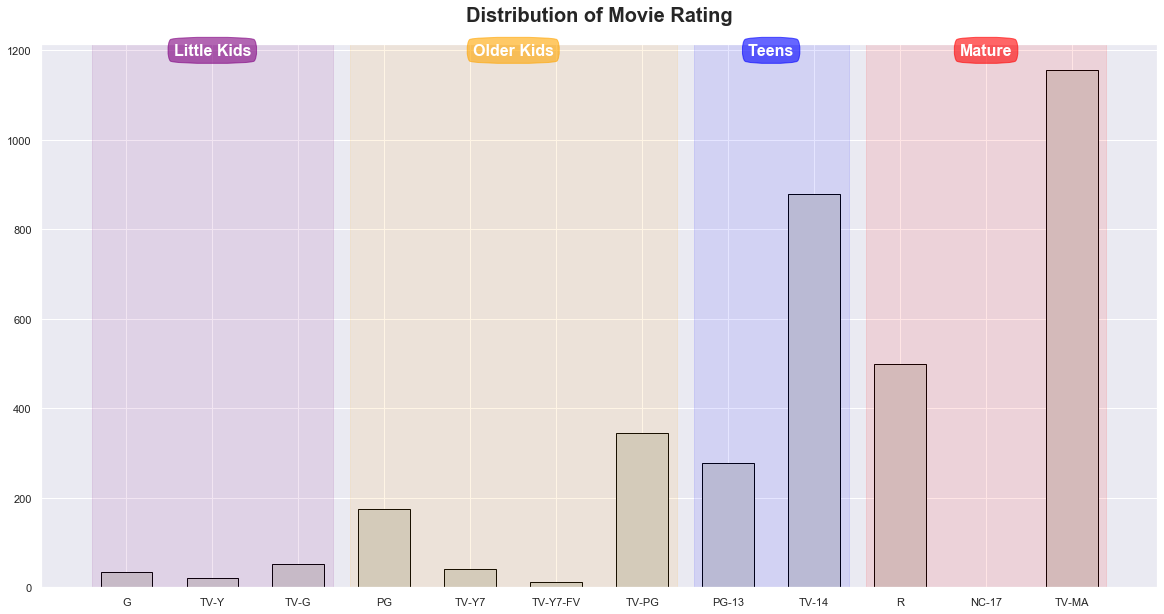

In [84]:
rating_order =  ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']

movie_rating = netflix_df.query("type == 'Movie'")["rating"].value_counts()[rating_order].fillna(0)
rating_barplot(movie_rating,'Movie' , 1200,'images/image5.png')

In [85]:
netflix_df.query("type == 'TV Show'")["rating"].value_counts()

TV-14    39
TV-MA    32
TV-PG    14
TV-Y7     6
TV-Y      3
R         1
TV-G      1
Name: rating, dtype: int64

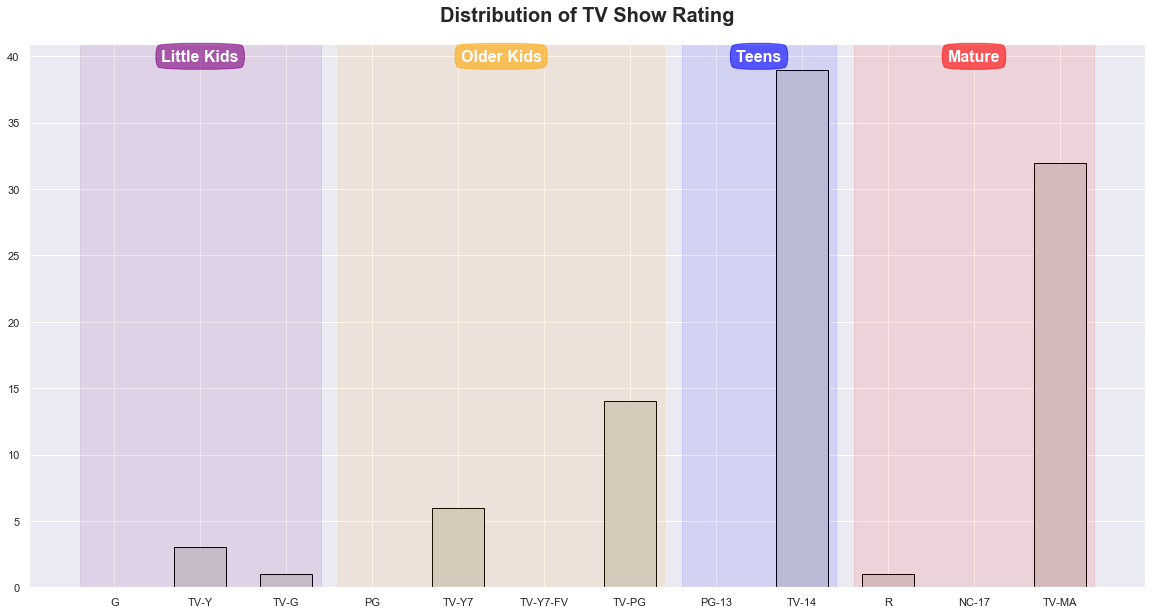

In [86]:
rating_order =  ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']
# tv_show_rating = netflix_df.query("type == 'TV Show'")["rating"].value_counts()[rating_order].fillna(0)
tv_show_rating = netflix_df.query("type == 'TV Show'")["rating"].value_counts().reindex(rating_order).fillna(0)
rating_barplot(tv_show_rating,'TV Show', 40,'images/image6.png')

21 - Draw a Figure about calculating how many movie or tv show styles there are in dataframe

In [87]:
categories = ", ".join(netflix_df['listed_in']).split(", ")
counter_list = Counter(categories).most_common(15)
labels = [_[0] for _ in counter_list][::-1]
values = [_[1] for _ in counter_list][::-1]
trace1 = go.Bar(y=labels, x=values, orientation="h", marker=dict(color="#dd55fe"))

data1 = [trace1]
layout = go.Layout(title="Top 15 Movie and Tv show styles", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data1, layout=layout)
pio.write_image(fig, "images/image7.png")
fig.show()

22 - Draw a Figure about calculating which countries tv show or movies are made 

In [88]:
categories = ", ".join(netflix_df['country']).split(", ")
counter_list = Counter(categories).most_common(15)
labels = [_[0] for _ in counter_list][::-1]
values = [_[1] for _ in counter_list][::-1]
trace1 = go.Bar(y=labels, x=values, orientation="h", marker=dict(color='#78b7de'))

data1 = [trace1]
layout = go.Layout(title="Top 15 Countries where tv show or movies are made", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data1, layout=layout)
pio.write_image(fig, "images/image8.png")
fig.show()

23 - Draw a Figure about calculating which actors are more acted in tv show and movie

In [89]:
categories = ", ".join(netflix_df['cast']).split(", ")
counter_list = Counter(categories).most_common(15)
labels = [_[0] for _ in counter_list][::-1]
values = [_[1] for _ in counter_list][::-1]
trace1 = go.Bar(y=labels, x=values, orientation="h", marker=dict(color='#851d58'))

data1 = [trace1]
layout = go.Layout(title="Top 15 Actors are more acted in both tv show and movie", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data1, layout=layout)
pio.write_image(fig, "images/image9.png")
fig.show()

24 - Draw a Figure top 20 tv show in terms of the number of season count

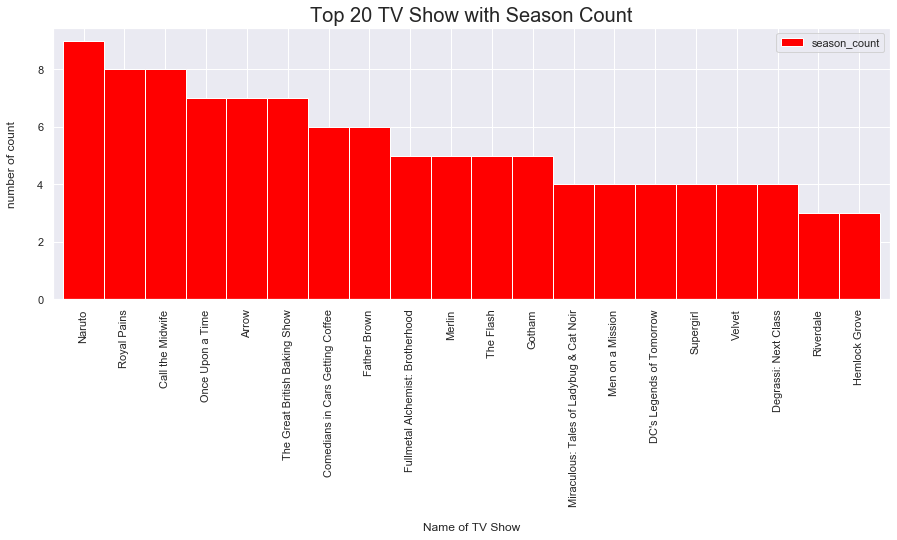

In [90]:
netflix_df_season =  netflix_df[['title','season_count']]
netflix_df_season = netflix_df_season[netflix_df_season["season_count"] != ""]
netflix_df_season = netflix_df_season.sort_values(by='season_count', ascending=False)
netflix_df_season = netflix_df_season.head(20)
netflix_df_season.title = netflix_df_season.title.astype(str)
netflix_df_season.season_count = netflix_df_season.season_count.astype(int)

netflix_df_season.plot(kind='bar',x='title',y='season_count', color='red', width=1, figsize=(15, 5))

plt.title('Top 20 TV Show with Season Count', fontsize=20, y=1)
plt.xlabel('Name of TV Show', labelpad=16)
plt.ylabel('number of count', labelpad=20)
plt.xticks(rotation=90)
plt.savefig('images/image10.png')
plt.show();

25 - Draw a Figure showing top 20 actors are more acted in Tv Show

In [91]:
netflix_df_top_20_actors = netflix_df[netflix_df["type"] == "TV Show"]

categories = ", ".join(netflix_df_top_20_actors['cast']).split(", ")
counter_list = Counter(categories).most_common(20)
labels = [_[0] for _ in counter_list][::-1]
values = [_[1] for _ in counter_list][::-1]
trace1 = go.Bar(y=labels, x=values, orientation="h", marker=dict(color='#40db64'))

data1 = [trace1]
layout = go.Layout(title="Top 20 Actors are more acted in Tv show ", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data1, layout=layout)
pio.write_image(fig, "images/image11.png")
fig.show()

26 - Draw a Figure showing top 20 actors are more acted in Movie

In [92]:
netflix_df_top_20_actors = netflix_df[netflix_df["type"] == "Movie"]

categories = ", ".join(netflix_df_top_20_actors['cast']).split(", ")
counter_list = Counter(categories).most_common(20)
labels = [_[0] for _ in counter_list][::-1]
values = [_[1] for _ in counter_list][::-1]
trace1 = go.Bar(y=labels, x=values, orientation="h", marker=dict(color='#c7b93e'))

data1 = [trace1]
layout = go.Layout(title="Top 20 Actors are more acted in Movie ", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data1, layout=layout)
pio.write_image(fig, "images/image12.png")
fig.show()

27 - Define Duration Minutes as a column by using duration column

In [93]:
netflix_df['duration_min'] = netflix_df.apply(lambda x : x['duration'].split(" ")[0] if "Season" not in x['duration'] else "", axis = 1)

27 - Draw a Figure showing top 10 most long duration movies 

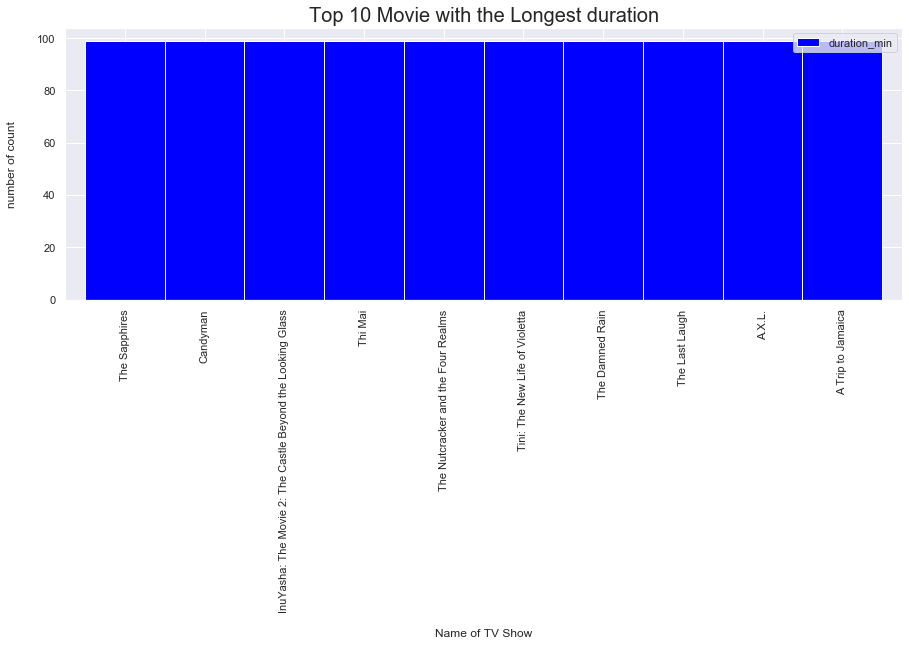

In [94]:
netflix_df_duration =  netflix_df[['title','duration_min']]
netflix_df_duration = netflix_df_duration[netflix_df_duration["duration_min"] != ""]
netflix_df_duration = netflix_df_duration.sort_values(by='duration_min', ascending=False)
netflix_df_duration =  netflix_df_duration.head(10)
netflix_df_duration.title = netflix_df_duration.title.astype(str)
netflix_df_duration.duration_min = netflix_df_duration.duration_min.astype(int)

netflix_df_duration.plot(kind='bar',x='title',y='duration_min', color='blue', width=1, figsize=(15, 5))

plt.title('Top 10 Movie with the Longest duration', fontsize=20, y=1)
plt.xlabel('Name of TV Show', labelpad=16)
plt.ylabel('number of count', labelpad=20)
plt.xticks(rotation=90)
plt.savefig('images/image13.png')
plt.show();

28 - Draw a Figure showing top 10 most shortest duration movies

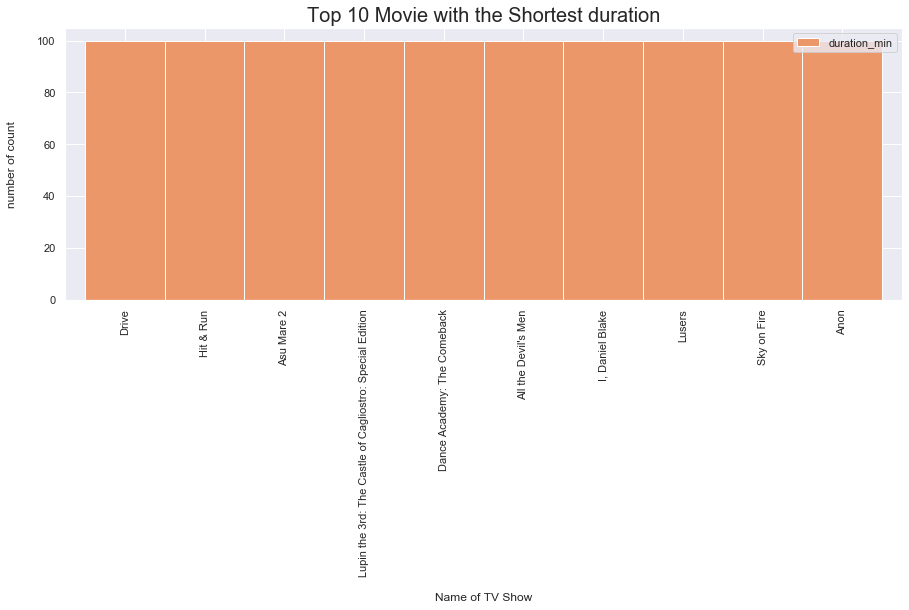

In [95]:
netflix_df_duration =  netflix_df[['title','duration_min']]
netflix_df_duration = netflix_df_duration[netflix_df_duration["duration_min"] != ""]
netflix_df_duration = netflix_df_duration.sort_values(by='duration_min', ascending=True)
netflix_df_duration =  netflix_df_duration.head(10)
netflix_df_duration.title = netflix_df_duration.title.astype(str)
netflix_df_duration.duration_min = netflix_df_duration.duration_min.astype(int)

netflix_df_duration.plot(kind='bar',x='title',y='duration_min', color='#eb976a', width=1, figsize=(15, 5))

plt.title('Top 10 Movie with the Shortest duration', fontsize=20, y=1)
plt.xlabel('Name of TV Show', labelpad=16)
plt.ylabel('number of count', labelpad=20)
plt.xticks(rotation=90)
plt.savefig('images/image14.png')
plt.show();

29 - Draw a Figure about calculating which director are more managed in tv show and movie

In [96]:
categories = ", ".join(netflix_df['director']).split(", ")
counter_list = Counter(categories).most_common(20)
labels = [_[0] for _ in counter_list][::-1]
values = [_[1] for _ in counter_list][::-1]
trace1 = go.Bar(y=labels, x=values, orientation="h", marker=dict(color='#a7d929'))

data1 = [trace1]
layout = go.Layout(title="Top 20 Director are more managed in both tv show and movie")
fig = go.Figure(data1, layout=layout)
pio.write_image(fig, "images/image15.png")
fig.show()

30 - Draw a Figure about calculating top 10 director are more managed in tv show

In [97]:
netflix_df_top_10_director = netflix_df[netflix_df["type"] == "TV Show"]

categories = ", ".join(netflix_df_top_10_director['director']).split(", ")
counter_list = Counter(categories).most_common(15)
counter_list.sort(key=itemgetter(1))
labels = [_[0] for _ in counter_list][::-1]
values = [_[1] for _ in counter_list][::-1]
trace1 = go.Bar(y=values, 
                x=labels, 
                orientation="v",
                marker=dict(color='#7369db'))

data1 = [trace1]
layout = go.Layout(title="Top 15 Actors are more acted in Tv show")
fig = go.Figure(data1, layout=layout)
pio.write_image(fig, "images/image16.png")
fig.show()

31 - Draw a Figure about calculating top 10 director are more managed in movie

In [98]:
netflix_df_top_10_director = netflix_df[netflix_df["type"] == "Movie"]

categories = ", ".join(netflix_df_top_10_director['director']).split(", ")
counter_list = Counter(categories).most_common(15)

labels = [_[0] for _ in counter_list][::-1]
values = [_[1] for _ in counter_list][::-1]
trace1 = go.Bar(y=values, 
                x=labels, 
                orientation="v", 
                marker=dict(color='#75d929'))

data1 = [trace1]
layout = go.Layout(title="Top 15 Actors are more acted in Movie")
fig = go.Figure(data1, layout=layout)
pio.write_image(fig, "images/image17.png")
fig.show()

32 - Draw a Figure about Top 10 most productive countries in terms of TV show and Movie

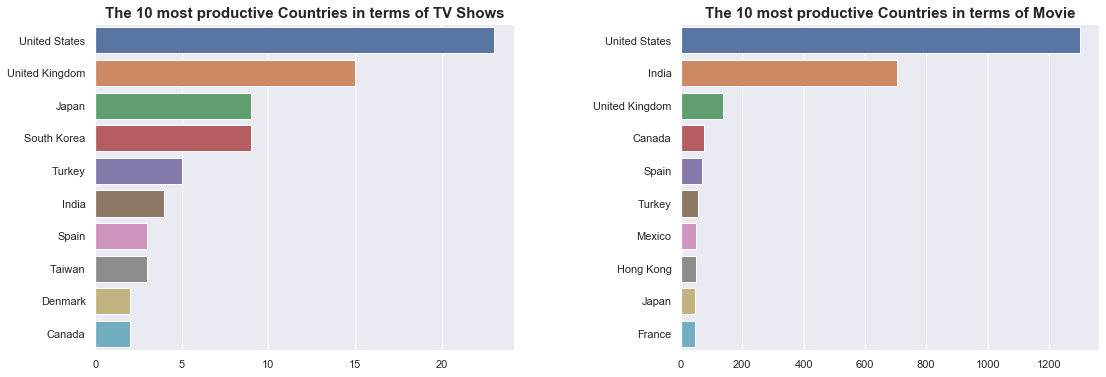

In [99]:
f,a = plt.subplots(1,2,figsize=(18,6))
f.subplots_adjust(wspace = .4)

netflix_df_top_10_tv_show_country = netflix_df[netflix_df["type"] == "TV Show"]
netflix_df_top_10_movie_country = netflix_df[netflix_df["type"] == "Movie"]

sns.barplot(netflix_df_top_10_tv_show_country["country"].value_counts().head(10), 
            netflix_df_top_10_tv_show_country["country"].value_counts().head(10).index, ax=a[0])
a[0].set_title('The 10 most productive Countries in terms of TV Shows', fontsize=15, fontweight='bold')
a[0].set_xlabel('')

sns.barplot(netflix_df_top_10_movie_country["country"].value_counts().head(10), 
            netflix_df_top_10_movie_country["country"].value_counts().head(10).index, ax=a[1])
a[1].set_title('The 10 most productive Countries in terms of Movie', fontsize=15, fontweight='bold')
a[1].set_xlabel('');
plt.savefig('images/image18.png')
plt.show()

33 - Draw a Figure about Top 10 most categories in terms of TV show and Movie

In [100]:
fig = make_subplots(rows=1, cols=2, horizontal_spacing=0.4,
      subplot_titles=("Top 10 most categories in TV Show",'Top 10 most categories acted in Movie'))

netflix_df_top_10_tv_show_country = netflix_df[netflix_df["type"] == "TV Show"]
netflix_df_top_10_movie_country = netflix_df[netflix_df["type"] == "Movie"]

categories = ", ".join(netflix_df_top_10_tv_show_country['listed_in']).split(", ")
counter_list = Counter(categories).most_common(15)
labels = [_[0] for _ in counter_list][::-1]
values = [_[1] for _ in counter_list][::-1]
trace1 = go.Bar(y=labels, x=values, orientation="h",name="", marker=dict(color="#123456"))
fig.add_trace(trace1,row = 1, col = 1)


categories = ", ".join(netflix_df_top_10_movie_country['listed_in']).split(", ")
counter_list = Counter(categories).most_common(15)
labels = [_[0] for _ in counter_list][::-1]
values = [_[1] for _ in counter_list][::-1]
trace2 = go.Bar(y=labels, x=values, orientation="h",name="", marker=dict(color="#654321"))
fig.add_trace(trace2,row = 1, col = 2)

fig.update_layout(showlegend=False, height = 650, width = 900, title_text="Top 10 most categories in terms of TV show and Movie")
pio.write_image(fig, "images/image19.png")
fig.show()

34 - Define WordCloud graph to show all titles in Netflix Image

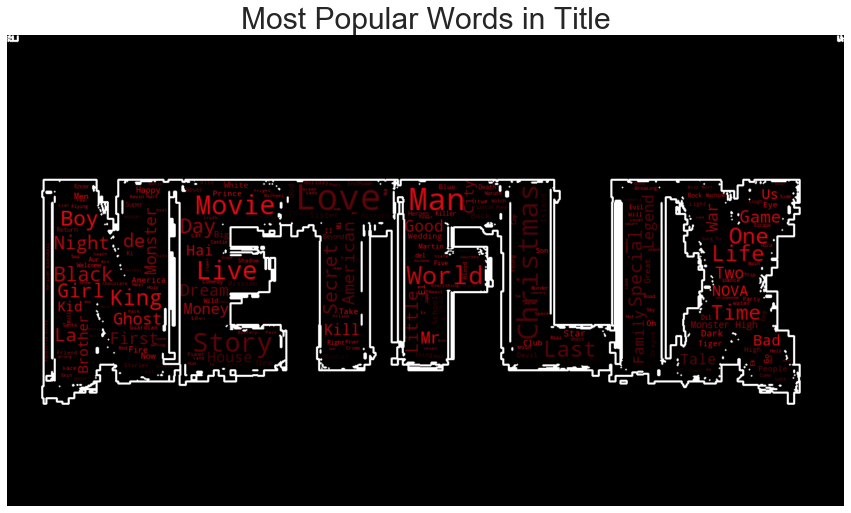

In [101]:
plt.figure(figsize=[15,15])

image = Image.open("images/netflix.png")
image_gray = image.convert('L')
image_invert = ImageOps.invert(image_gray)
char_mask = np.array(image_invert)
image_colors = ImageColorGenerator(char_mask)

wordcloud = WordCloud(stopwords=STOPWORDS,background_color = 'black',  
                      max_words =300,
                      mask=char_mask,
                      contour_width=3, 
                      contour_color='white',
                      random_state=42).generate(' '.join(netflix_df['title']))

image_colors = ImageColorGenerator(np.array(image))
wordcloud.recolor(color_func=image_colors)


plt.imshow(wordcloud, interpolation='bilinear') 
plt.axis('off')
plt.title('Most Popular Words in Title',fontsize = 30)
plt.savefig('images/image20.png')
plt.show()

35 - Define World Map Figure to show which country produces TV Show and Movie

In [102]:
categories = ", ".join(netflix_df['country']).split(", ")
counter_list = Counter(categories).most_common(len(categories))


counter_list.remove(('Vatican City', 1))
counter_list.remove(('East Germany', 1))
counter_list.remove(('West Germany', 2))
counter_list.remove(('Soviet Union', 3))

labels = [_[0] for _ in counter_list][::-1]
values = [_[1] for _ in counter_list][::-1]


df_countries = pd.DataFrame(data = {'country': labels, 'count': values })

data = [go.Choropleth(
    locationmode='country names',
    locations=df_countries.country,
    z=df_countries["count"]
    )]

layout = go.Layout(title='Which Country produces TV Show and Movie')

fig = dict( data=data, layout=layout )
pio.write_image(fig, "images/image21.png")
iplot( fig )  